Kemal Sebzeci
2312729009
https://github.com/Futhark1393/YZS_Proje_1

# Genetik Algoritma ile Öğrenci Etüt Programı Optimizasyonu

## Senaryo 9: Öğrenci Etüt Programı Planlaması

Bu çalışmada, bir öğrencinin Matematik ve Fen derslerine ayıracağı süreyi optimize ederek sınav başarısını maksimize etmesi hedeflenmiştir.

**Matematiksel Model:**
* **Amaç Fonksiyonu:** $y = 4x_1 + 5x_2 - 0.5x_1^2 - 0.2x_2^2$
* **Değişkenler:** $x_1$ (Matematik), $x_2$ (Fen) $\in [0, 10]$
* **Kısıtlar:**
    1.  Toplam Süre $\le 12$
    2.  Fen Süresi $\ge 2$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Sonuçların her çalıştırmada tutarlı olması için randomness
random.seed(99)
np.random.seed(99)

print("Gerekli kütüphaneler yüklendi ve ayarlar yapıldı.")

Gerekli kütüphaneler yüklendi ve ayarlar yapıldı.


### 1. Problemin Modellenmesi

Aşağıdaki kod bloğunda, problemin sınırları, amaç fonksiyonu ve kısıtları ihlal edenlere uygulanacak **Ceza Fonksiyonu** tanımlanmıştır.

In [ ]:
#Problem Parametreleri
ALT_SINIR = 0.0
UST_SINIR = 10.0
TOPLAM_ZAMAN_LIMITI = 12.0
MIN_FEN_SURESI = 2.0

def basari_hesapla(mat_saat, fen_saat):
    """
    Amaç Fonksiyonu: 4x1 + 5x2 - 0.5x1^2 - 0.2x2^2
    """
    skor = (4 * mat_saat) + (5 * fen_saat) - (0.5 * mat_saat**2) - (0.2 * fen_saat**2)
    return skor

def ceza_uygula(mat, fen):
    """
    Kısıtları kontrol eder ve ihlal varsa ceza olarak skoru düşürür.
    """
    ceza_puani = 0
    ceza_katsayisi = 100  # Bilerek yüksek tutuldu

    # Kısıt 1: Toplam süre 12 saati geçmemeli
    if (mat + fen) > TOPLAM_ZAMAN_LIMITI:
        ceza_puani += (mat + fen - TOPLAM_ZAMAN_LIMITI) * ceza_katsayisi

    # Kısıt 2: Fen dersi en az 2 saat olmalı
    if fen < MIN_FEN_SURESI:
        ceza_puani += (MIN_FEN_SURESI - fen) * ceza_katsayisi

    return ceza_puani

def birey_fitness(birey):
    """Genel uygunluk fonksiyonu: Amaç - Ceza"""
    m, f = birey[0], birey[1]
    return basari_hesapla(m, f) - ceza_uygula(m, f)

print("Matematiksel model ve ceza fonksiyonları tanımlandı.")

Matematiksel model ve ceza fonksiyonları tanımlandı.


### 2. Genetik Algoritma Motoru

Bu bölümde algoritmanın temel yapı taşları oluşturulmuştur:
* **İlk Popülasyon:** Rastgele çözümler üretilir.
* **Turnuva Seçimi:** Ebeveynler rastgele seçilen adaylar arasından en iyisi alınarak belirlenir.
* **Çaprazlama (Crossover):** Ebeveynlerin genleri karıştırılır.
* **Mutasyon:** Genlerde rastgele küçük oynamalar yapılır.
* **Algoritma Döngüsü:** Nesiller boyunca en iyi çözümü arar ve **Elitizm** ile en iyi bireyi korur.

In [ ]:
#GA AYARLARI
POP_SAYISI = 50       # Popülasyon büyüklüğü
ITERASYON = 100       # Kaç nesil döneceği
MUTASYON_SANS = 0.15  # Mutasyon ihtimali
GEN_GUCCU = 0.6       # Mutasyonun etki şiddeti

def ilk_populasyon(adet):
    """Rastgele başlangıç çözümleri üretir."""
    return np.random.uniform(ALT_SINIR, UST_SINIR, (adet, 2))

def ebeveyn_sec(pop, skorlar):
    """Turnuva Yöntemi ile ebeveyn seçer."""
    # Rastgele 3 aday seçip savaştırıyoruz
    aday_idx = np.random.randint(0, len(pop), 3)
    en_iyi_aday = aday_idx[np.argmax(skorlar[aday_idx])]
    return pop[en_iyi_aday]

def gen_birlestir(ata1, ata2):
    """Tek Noktalı Çaprazlama (Crossover)"""
    if np.random.rand() > 0.8: # %80 ihtimalle çaprazlama yap
        return ata1.copy(), ata2.copy()

    # Genleri takas et
    yeni1 = np.array([ata1[0], ata2[1]])
    yeni2 = np.array([ata2[0], ata1[1]])
    return yeni1, yeni2

def mutasyon_ugrat(genler):
    """Genlerde rastgele sapmalar oluşturur."""
    if np.random.rand() < MUTASYON_SANS:
        # Hangi geni değiştireceğimizi seçiyoruz (0:Mat veya 1:Fen)
        gen_idx = np.random.randint(0, 2)
        degisim = np.random.normal(0, GEN_GUCCU)
        genler[gen_idx] += degisim
        # Sınırları aşarsa düzelt
        genler[gen_idx] = np.clip(genler[gen_idx], ALT_SINIR, UST_SINIR)
    return genler

def algoritmayi_kostur():
    """GA'nın ana döngüsü"""
    populasyon = ilk_populasyon(POP_SAYISI)
    gelisim_takibi = []

    global_en_iyi_cozum = None
    global_en_iyi_skor = -99999

    for i in range(ITERASYON):
        # 1. Mevcut nesli değerlendir
        fitness_degerleri = np.array([birey_fitness(b) for b in populasyon])

        # En iyiyi bul ve sakla
        max_idx = np.argmax(fitness_degerleri)
        en_yuksek_skor = fitness_degerleri[max_idx]
        gelisim_takibi.append(en_yuksek_skor)

        if en_yuksek_skor > global_en_iyi_skor:
            global_en_iyi_skor = en_yuksek_skor
            global_en_iyi_cozum = populasyon[max_idx].copy()

        # 2. Yeni nesil üretimi (Elitizm dahil: En iyiyi direkt aktar)
        yeni_jenerasyon = [populasyon[max_idx]]

        while len(yeni_jenerasyon) < POP_SAYISI:
            # Seçim
            p1 = ebeveyn_sec(populasyon, fitness_degerleri)
            p2 = ebeveyn_sec(populasyon, fitness_degerleri)

            # Çaprazlama
            c1, c2 = gen_birlestir(p1, p2)

            # Mutasyon ve Ekleme
            yeni_jenerasyon.append(mutasyon_ugrat(c1))
            if len(yeni_jenerasyon) < POP_SAYISI:
                yeni_jenerasyon.append(mutasyon_ugrat(c2))

        populasyon = np.array(yeni_jenerasyon)

    return global_en_iyi_cozum, global_en_iyi_skor, gelisim_takibi

print("Genetik Algoritma fonksiyonları hazır.")

Genetik Algoritma fonksiyonları hazır.


### 3. Sonuçlar ve Görselleştirme

Algoritma çalıştırılır ve bulunan en iyi **Matematik** ve **Fen** çalışma saatleri raporlanır.

Ayrıca, algoritmanın nesiller boyunca performansını (öğrenme eğrisini) gösteren **Fitness Gelişim Grafiği** çizdirilir.

Optimizasyon Başlatılıyor...

Nesil 10: En İyi Skor = 36.3445
Nesil 20: En İyi Skor = 36.3445
Nesil 30: En İyi Skor = 36.3445
Nesil 40: En İyi Skor = 36.3445
Nesil 50: En İyi Skor = 36.3445
Nesil 60: En İyi Skor = 36.3445
Nesil 70: En İyi Skor = 36.3445
Nesil 80: En İyi Skor = 36.3445
Nesil 90: En İyi Skor = 36.3445
Nesil 100: En İyi Skor = 36.3445

SONUÇLAR
Matematik Süresi (x1) : 2.5965 Saat
Fen Süresi (x2)       : 9.4035 Saat
Toplam Süre           : 12.0000 Saat
Maksimum Skor         : 36.3445
Kısıtlar Sağlandı mı? : True


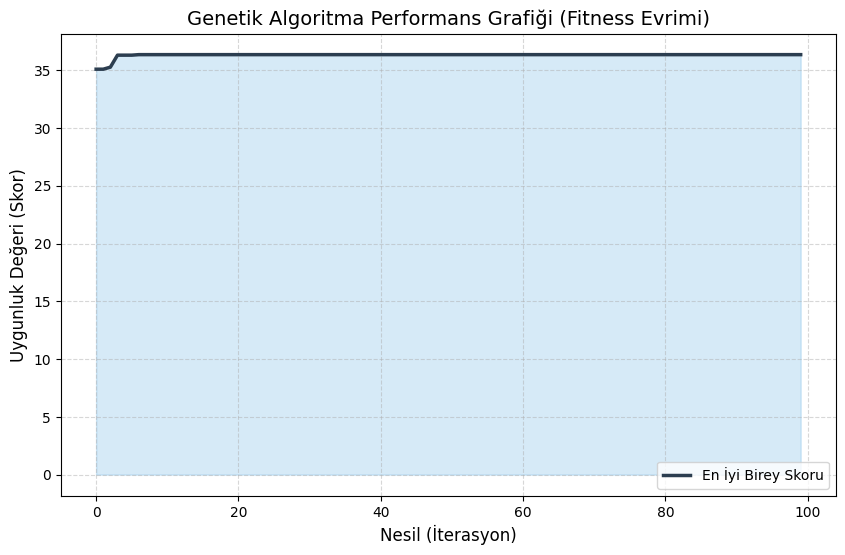

In [ ]:
# --- ÇALIŞTIRMA VE ANALİZ ---

print("Optimizasyon Başlatılıyor...\n")

populasyon = ilk_populasyon(POP_SAYISI)
gelisim_takibi = []

global_en_iyi_cozum = None
global_en_iyi_skor = -99999

for i in range(ITERASYON):
    # 1. Mevcut nesli değerlendir
    fitness_degerleri = np.array([birey_fitness(b) for b in populasyon])

    # En iyiyi bul ve sakla
    max_idx = np.argmax(fitness_degerleri)
    en_yuksek_skor = fitness_degerleri[max_idx]
    gelisim_takibi.append(en_yuksek_skor)

    if en_yuksek_skor > global_en_iyi_skor:
        global_en_iyi_skor = en_yuksek_skor
        global_en_iyi_cozum = populasyon[max_idx].copy()

    # Her 10 nesilde bir ilerlemeyi yazdır (EKSİK OLAN KISIM)
    if (i + 1) % 10 == 0:
        print(f"Nesil {i+1}: En İyi Skor = {en_yuksek_skor:.4f}")

    # 2. Yeni nesil üretimi (Elitizm dahil: En iyiyi direkt aktar)
    yeni_jenerasyon = [populasyon[max_idx]]

    while len(yeni_jenerasyon) < POP_SAYISI:
        # Seçim
        p1 = ebeveyn_sec(populasyon, fitness_degerleri)
        p2 = ebeveyn_sec(populasyon, fitness_degerleri)

        # Çaprazlama
        c1, c2 = gen_birlestir(p1, p2)

        # Mutasyon ve Ekleme
        yeni_jenerasyon.append(mutasyon_ugrat(c1))
        if len(yeni_jenerasyon) < POP_SAYISI:
            yeni_jenerasyon.append(mutasyon_ugrat(c2))

    populasyon = np.array(yeni_jenerasyon)

# Sonuçları Yazdır
print("\n" + "=" * 30)
print("SONUÇLAR")
print("=" * 30)
print(f"Matematik Süresi (x1) : {global_en_iyi_cozum[0]:.4f} Saat")
print(f"Fen Süresi (x2)       : {global_en_iyi_cozum[1]:.4f} Saat")
print(f"Toplam Süre           : {sum(global_en_iyi_cozum):.4f} Saat")
print(f"Maksimum Skor         : {global_en_iyi_skor:.4f}")

# Kısıt Kontrolü
kontrol1 = sum(global_en_iyi_cozum) <= TOPLAM_ZAMAN_LIMITI + 0.1
kontrol2 = global_en_iyi_cozum[1] >= MIN_FEN_SURESI - 0.1
print(f"Kısıtlar Sağlandı mı? : {'True' if kontrol1 and kontrol2 else 'False'}")

# --- GRAFİK ÇİZİMİ (Sadece Fitness) ---
plt.figure(figsize=(10, 6))
plt.plot(gelisim_takibi, color='#2c3e50', linewidth=2.5, label='En İyi Birey Skoru')

# Grafiği Güzelleştirme
plt.title("Genetik Algoritma Performans Grafiği (Fitness Evrimi)", fontsize=14)
plt.xlabel("Nesil (İterasyon)", fontsize=12)
plt.ylabel("Uygunluk Değeri (Skor)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.fill_between(range(len(gelisim_takibi)), gelisim_takibi, color='#3498db', alpha=0.2)

plt.show()